In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# Data Visualisation

Downloaded dataset

In [14]:
Churn= pd.read_csv(r'C:\Users\mathe\OneDrive\Desktop\IBM PROJECT/Churn_Modelling.csv')

In [15]:
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
Churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
Churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
Churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,2,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,1,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,8,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,1,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,2,1,1,1,79084.10


In [26]:
print(Churn.shape)
Churn['Gender'].value_counts()

(10000, 11)


Male      5457
Female    4543
Name: Gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

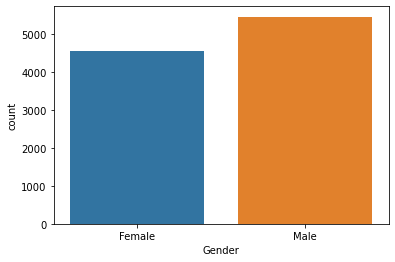

In [27]:
sns.countplot('Gender' , data =Churn)

Create dummy for gender column for getting numeric data for seaborn bar plot

In [28]:
gender_dummies = pd.get_dummies(Churn['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [29]:
Churn=pd.concat([Churn,gender_dummies], axis =1)
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
0,1,15634602,Hargrave,619,France,Female,2,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,1,1,0,1,112542.58,1,0
2,3,15619304,Onio,502,France,Female,8,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,1,2,0,0,93826.63,1,0
4,5,15737888,Mitchell,850,Spain,Female,2,1,1,1,79084.10,1,0


<AxesSubplot:xlabel='Geography', ylabel='Female'>

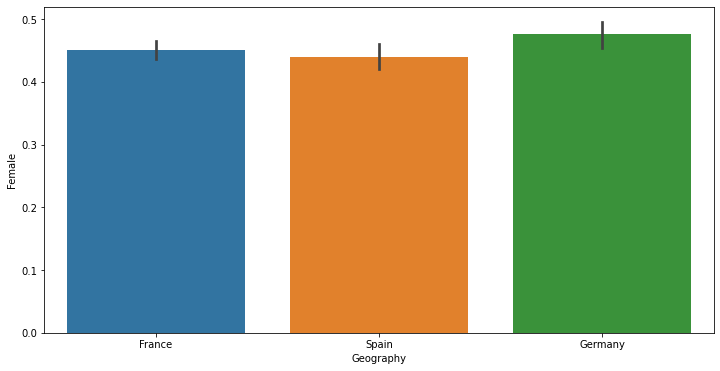

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='Geography',y='Female', data = Churn)

In [32]:
surname_Churn = pd.DataFrame(Churn['Surname'].value_counts())
surname_Churn

,Surname
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Izmailov,1
Bold,1
Bonham,1
Poninski,1


<AxesSubplot:ylabel='Surname'>

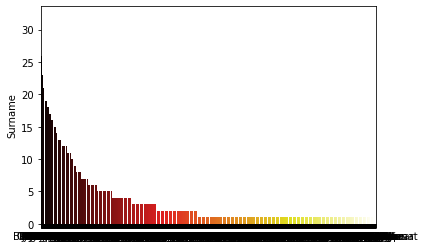

In [38]:
sns.barplot(x = surname_Churn.index ,y=surname_Churn['Surname'], palette  ='hot')

Plotting customerid

In [43]:
balance_Churn = pd.DataFrame(Churn['Balance'].value_counts())
balance_Churn

KeyError: 'Balance'

LOAD DATASET

In [44]:
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
0,1,15634602,Hargrave,619,France,Female,2,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,1,1,0,1,112542.58,1,0
2,3,15619304,Onio,502,France,Female,8,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,1,2,0,0,93826.63,1,0
4,5,15737888,Mitchell,850,Spain,Female,2,1,1,1,79084.10,1,0


In [45]:
Churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
9995,9996,15606229,Obijiaku,771,France,Male,5,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,France,Male,10,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,France,Female,7,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,3,2,1,0,92888.52,0,1
9999,10000,15628319,Walker,792,France,Female,4,1,1,0,38190.78,1,0


Perform Below Visulization

# Univariate Analysis

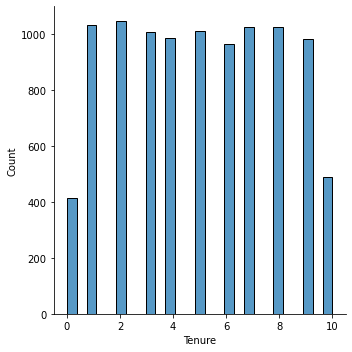

In [51]:
sns.displot(Churn.Tenure)

# Bi-variate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RowNumber', ylabel='CustomerId'>

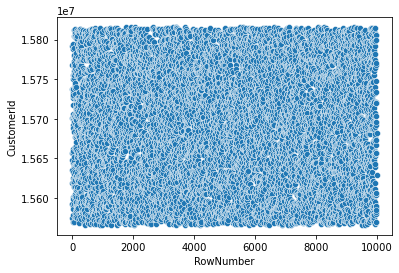

In [57]:
sns.scatterplot(Churn.RowNumber,Churn.CustomerId)

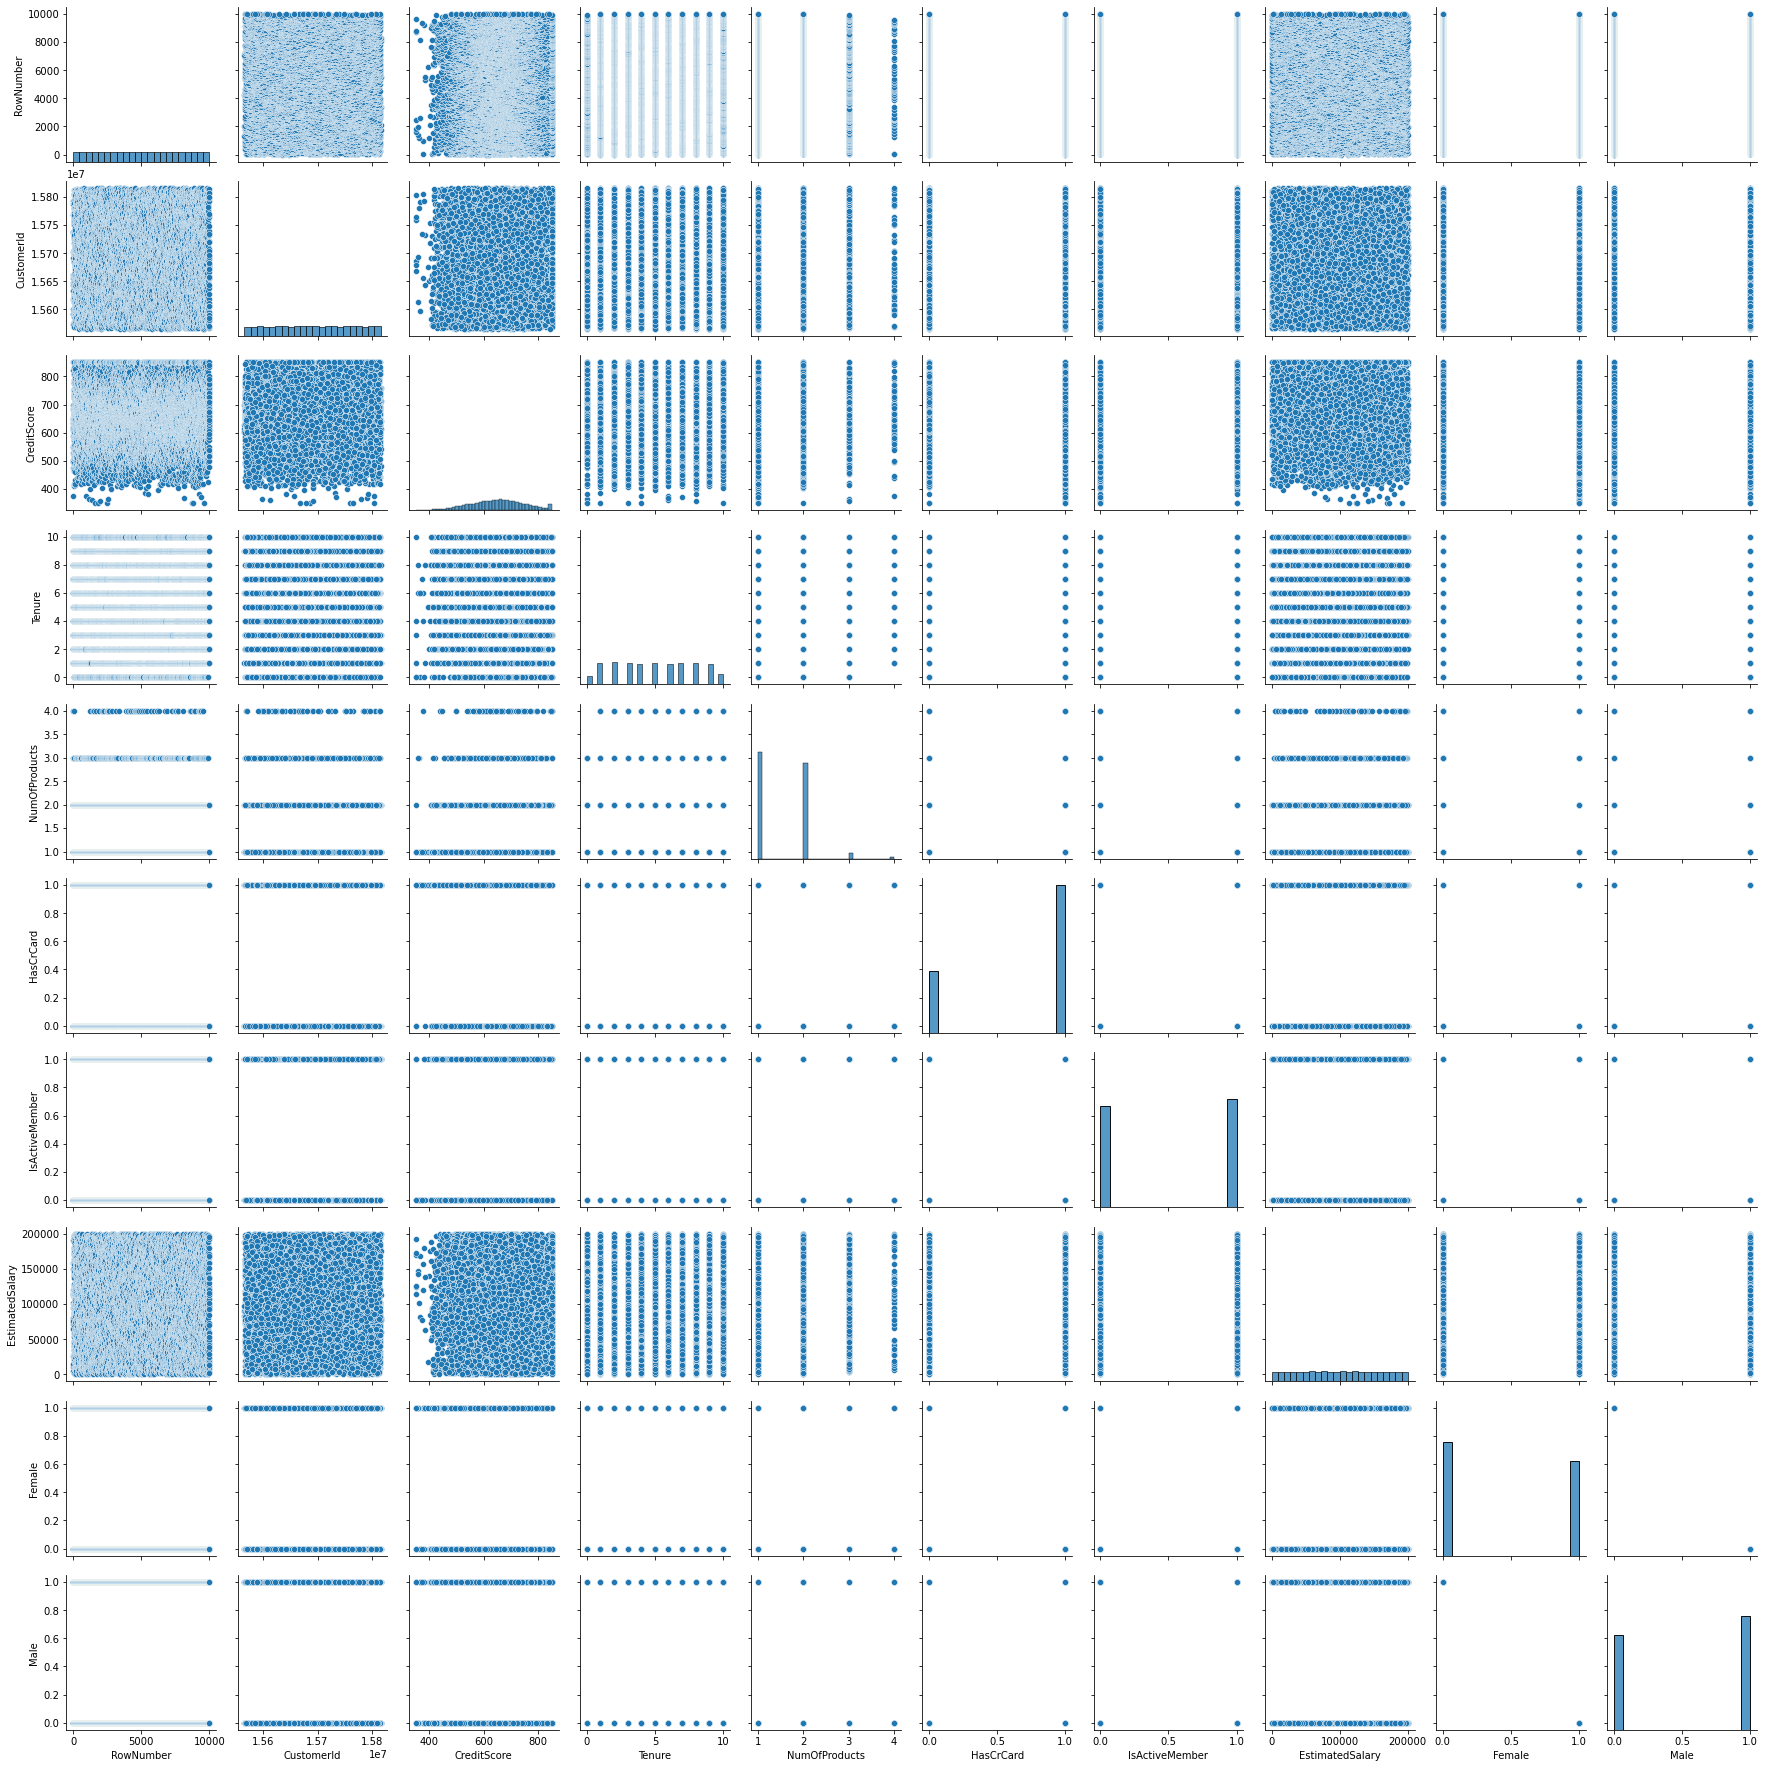

In [59]:
sns.pairplot(Churn)

# Perform Descriptive Statistics on the Dataset

In [60]:
Churn.describe()

,RowNumber,CustomerId,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,5.012800,1.530200,0.70550,0.515100,100090.239881,0.454300,0.545700
std,2886.89568,7.193619e+04,96.653299,2.892174,0.581654,0.45584,0.499797,57510.492818,0.497932,0.497932
min,1.00000,1.556570e+07,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,3.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,5.000000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000
75%,7500.25000,1.575323e+07,718.000000,7.000000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000
max,10000.00000,1.581569e+07,850.000000,10.000000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000


# Handle the Missing Values

In [61]:
Churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Tenure             0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Female             0
Male               0
dtype: int64

Find the outliers and replace the outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

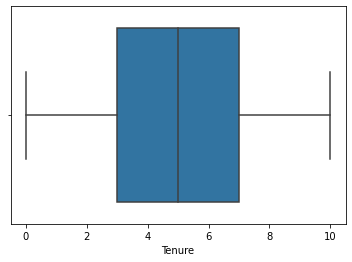

In [63]:
sns.boxplot(Churn['Tenure'])

In [65]:
Churn['Tenure']=np.where(Churn['Tenure']<400,650,Churn['Tenure'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

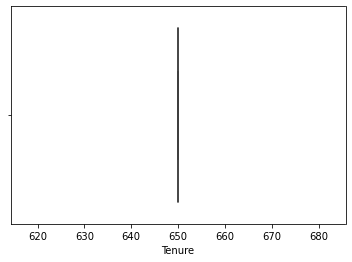

In [67]:
sns.boxplot(Churn['Tenure'])

# Check for Categorical columns and perform encoding.

In [68]:
Churn['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [69]:
Churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
9995,9996,15606229,Obijiaku,771,France,1,650,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,France,1,650,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,France,0,650,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,1,650,2,1,0,92888.52,0,1
9999,10000,15628319,Walker,792,France,0,650,1,1,0,38190.78,1,0


# Split the data into dependent and independent variables.

In [70]:
y=Churn['EstimatedSalary']
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [71]:
x=Churn.drop(columns=['EstimatedSalary'],axis=1)
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Female,Male
0,1,15634602,Hargrave,619,France,0,650,1,1,1,1,0
1,2,15647311,Hill,608,Spain,0,650,1,0,1,1,0
2,3,15619304,Onio,502,France,0,650,3,1,0,1,0
3,4,15701354,Boni,699,France,0,650,2,0,0,1,0
4,5,15737888,Mitchell,850,Spain,0,650,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,650,2,1,0,0,1
9996,9997,15569892,Johnstone,516,France,1,650,1,1,1,0,1
9997,9998,15584532,Liu,709,France,0,650,1,0,1,1,0
9998,9999,15682355,Sabbatini,772,Germany,1,650,2,1,0,0,1


In [72]:
x=Churn.drop(columns=['Geography'])

In [73]:
x=Churn.drop(columns=['Surname','Geography'])

In [74]:
x

,RowNumber,CustomerId,CreditScore,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
0,1,15634602,619,0,650,1,1,1,101348.88,1,0
1,2,15647311,608,0,650,1,0,1,112542.58,1,0
2,3,15619304,502,0,650,3,1,0,113931.57,1,0
3,4,15701354,699,0,650,2,0,0,93826.63,1,0
4,5,15737888,850,0,650,1,1,1,79084.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,1,650,2,1,0,96270.64,0,1
9996,9997,15569892,516,1,650,1,1,1,101699.77,0,1
9997,9998,15584532,709,0,650,1,0,1,42085.58,1,0
9998,9999,15682355,772,1,650,2,1,0,92888.52,0,1


In [75]:
x=scale(x)

NameError: name 'scale' is not defined

In [76]:
x

,RowNumber,CustomerId,CreditScore,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male
0,1,15634602,619,0,650,1,1,1,101348.88,1,0
1,2,15647311,608,0,650,1,0,1,112542.58,1,0
2,3,15619304,502,0,650,3,1,0,113931.57,1,0
3,4,15701354,699,0,650,2,0,0,93826.63,1,0
4,5,15737888,850,0,650,1,1,1,79084.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,1,650,2,1,0,96270.64,0,1
9996,9997,15569892,516,1,650,1,1,1,101699.77,0,1
9997,9998,15584532,709,0,650,1,0,1,42085.58,1,0
9998,9999,15682355,772,1,650,2,1,0,92888.52,0,1


In [79]:
x=scale(x)

In [80]:
x

array([[-1.73187761, -0.78321342, -0.32622142, ...,  0.02188649,
         1.09598752, -1.09598752],
       [-1.7315312 , -0.60653412, -0.44003595, ...,  0.21653375,
         1.09598752, -1.09598752],
       [-1.73118479, -0.99588476, -1.53679418, ...,  0.2406869 ,
         1.09598752, -1.09598752],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ..., -1.00864308,
         1.09598752, -1.09598752],
       [ 1.7315312 , -0.11935577,  1.25683526, ..., -0.12523071,
        -0.91241915,  0.91241915],
       [ 1.73187761, -0.87055909,  1.46377078, ..., -1.07636976,
         1.09598752, -1.09598752]])

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [83]:
x_train.shape

(8000, 11)

In [84]:
x_test.shape

(2000, 11)

In [85]:

y_test.shape

(2000,)